# Solving TSP for benchmarking 

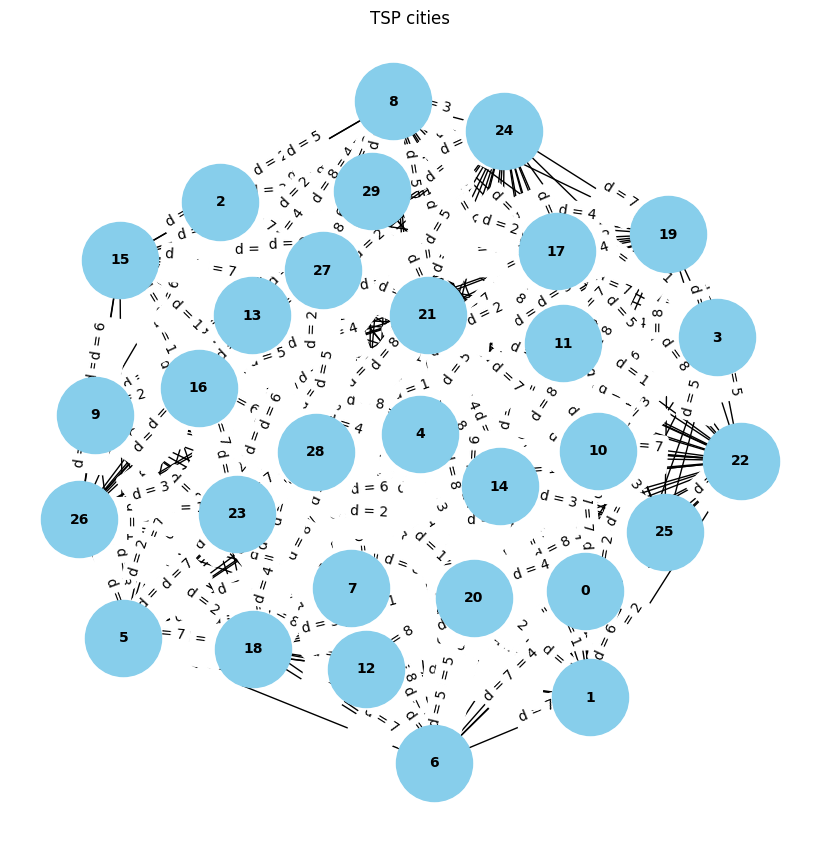

In [6]:
from amplify import solve

from TSP.model import Tsp

n = 30

tsp = Tsp(n, solver="Amplify", seed=123, draw=True)

qubo = tsp.qubo(penalty=1_000_000)
model = qubo["model"]

# tsp.matrix


## Brute Force

bruteforce took too long


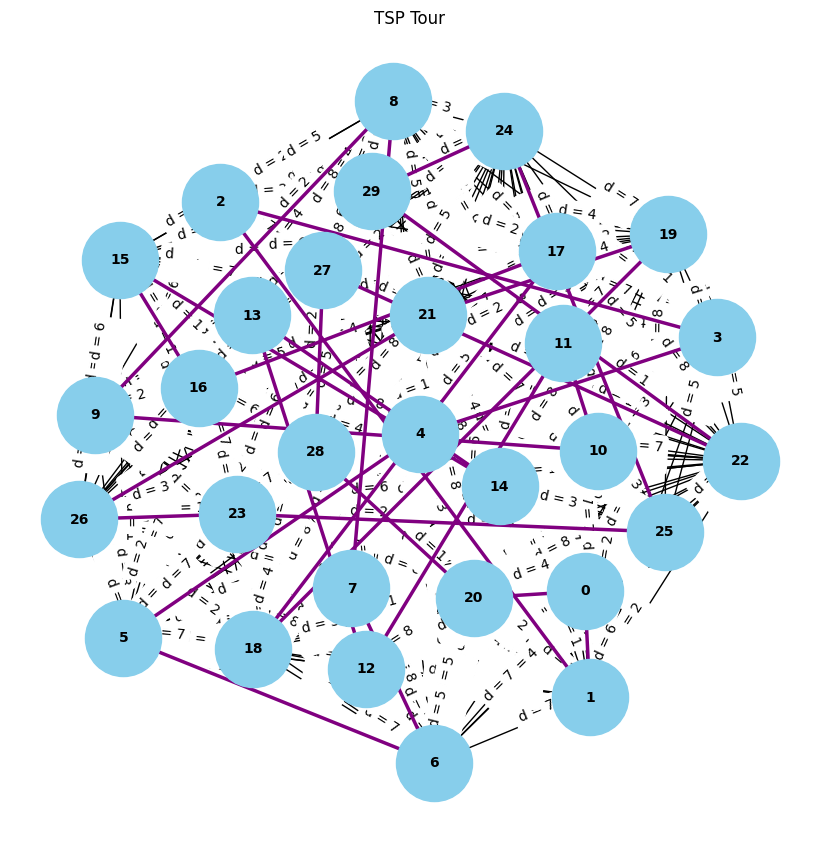

Cost: 106, Tour: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 26, 23, 25, 24, 29, 22, 27, 28, 20), took 2.0763044357299805 seconds
106


In [5]:
from TSP.core import bruteforce


cost, tour, time_taken = bruteforce(tsp.matrix, timeout=2)

tsp.draw_tour(tour)
print(f"Cost: {cost}, Tour: {tour}, took {time_taken} seconds")
print(tsp.get_cost(tour))

## Fixstars Amplify AE

In [6]:
# Initialise Fixstars Client
from Utils.solvers import GetFixstarsClient

clientFS = GetFixstarsClient()

# Solve set partitioning and view result
resultF = solve(model, clientFS)

tsp.interpret(resultF)

([3, 0, 5, 4, 1, 2], 18.0, 0.058937)

## Gurobi

In [ ]:
from Utils.solvers import GetGurobiClient

# for window with conda env
clientG = GetGurobiClient(r"D:\miniconda3\envs\cwq\gurobi110.dll")
resultG = solve(model, clientG)

tsp.interpret(resultG)

## D-Wave

In [5]:
# from Utils.solvers import GetDWaveClient

# clientDWave = GetDWaveClient()
# clientDWave.parameters.num_reads = 3_000
# result = solve(model, clientDWave)
# 
# tsp.interpret(result)
